<h1 style="text-align:center">Fashion MNIST Classifier</h1>

## Import necessary Libraries

In [18]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Obtain datasets

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('../datasets/',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('../datasets/',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, shuffle=True, batch_size=64)

100.0%

Extracting ../datasets/FashionMNIST\raw\train-images-idx3-ubyte.gz to ../datasets/FashionMNIST\raw


111.0%

Extracting ../datasets/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../datasets/FashionMNIST\raw


100.0%

Extracting ../datasets/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../datasets/FashionMNIST\raw


159.1%..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ../datasets/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../datasets/FashionMNIST\raw
Processing...
Done!


torch.Size([64, 1, 28, 28])


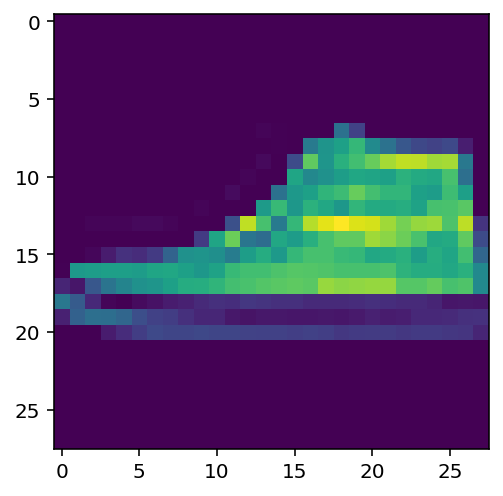

In [3]:
# Viewing an image from the datasets
image, label = next(iter(trainloader))
plt.imshow(image[0].view(image.shape[2],-1))
print(image.shape)

In [6]:
# number of classes
label.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Building the Network

In [7]:
# Network Architecture

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        # flattening the images
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [9]:
# Creaing the network and defining Loss function and optimizer 
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [11]:
%%time
# Training the network
epochs = 5

for i in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        net_output = model(images)
        loss = criterion(net_output, labels)
        
        # clearing the gradients and performing backpropagation
        optimizer.zero_grad()
        loss.backward()
        # optimising the model parameters based on the loss
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 0.5133230884287403
Training Loss: 0.390551673133236
Training Loss: 0.3572166792905407
Training Loss: 0.3333586528738424
Training Loss: 0.315853886965559
Wall time: 1min 57s


## Testing the model

In [30]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(8,11), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

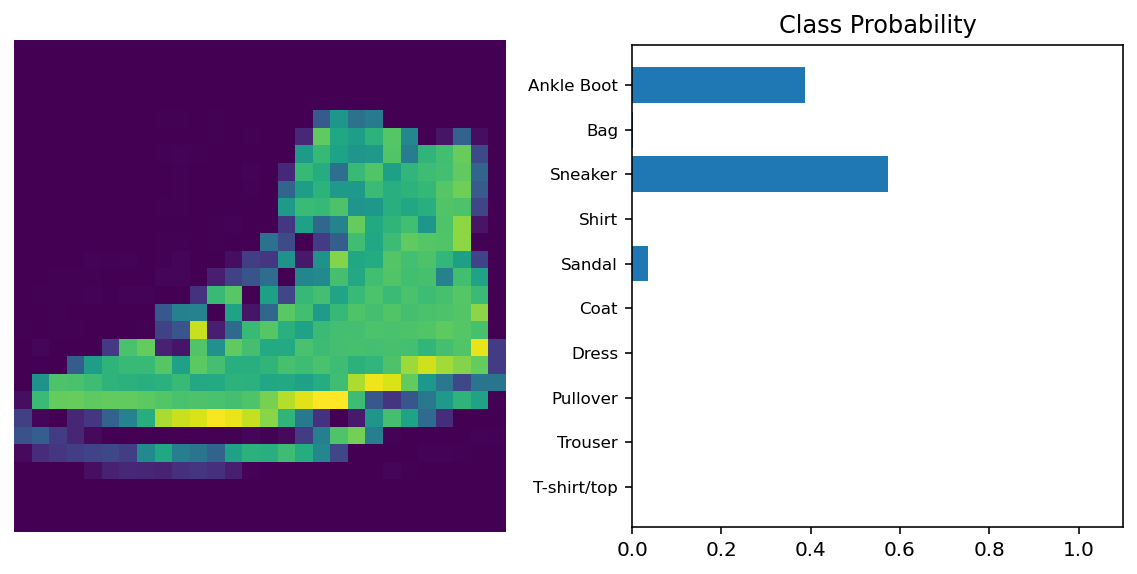

In [32]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# taking only a single image from the set
image = images[0]
# converting the 2D image into a 1D vector(i.e flattening)
image - image.resize_(1, 784)

# calculating the probabiltiy distribution for the image classes
probs = torch.exp(model(image))

# plotting the image along with the probabilities
view_classify(image.resize_(1, 28, 28), probs, version='Fashion')